# Lyapunov exponent in Standard map

Author: Martin Horvat, January 2024

## Common

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
c2pi = 2 * np.pi

# standard map at K
# x = (q,p)
def stm(x, K):
    q = np.mod(x[0] + x[1], c2pi)
    p = np.mod(x[1] + K * np.sin(q), c2pi)
    return np.array([q, p])

# gradient of standard map at K
# x = (q,p)
def grad_stm(x, K):
    tmp = K*np.cos(x[0] + x[1])
    return np.array([[1, 1], [tmp, 1 + tmp]])

# nesting function
def nest(f, x0, n):
    x = x0.copy()
    v = [x]
    for _ in range(n): 
        x = f(x)
        v.append(x)
        
    return np.array(v)

def stm_lyap(x0, K, n, fac = 1e3):
    
    M = np.identity(2)
    lyap = np.zeros(2)
    x = x0.copy()
    
    for _ in range(n):
        M = grad_stm(x, K) @ M
   
        if np.linalg.norm(M) > fac:
            Q, R = np.linalg.qr(M)
            lyap += np.log(np.abs(R.diagonal()))
            M = Q
        x = stm(x, K)
         
    _, R = np.linalg.qr(M)
    lyap += np.log(np.abs(R.diagonal()))
    
    return lyap/n

## Poincare portrait

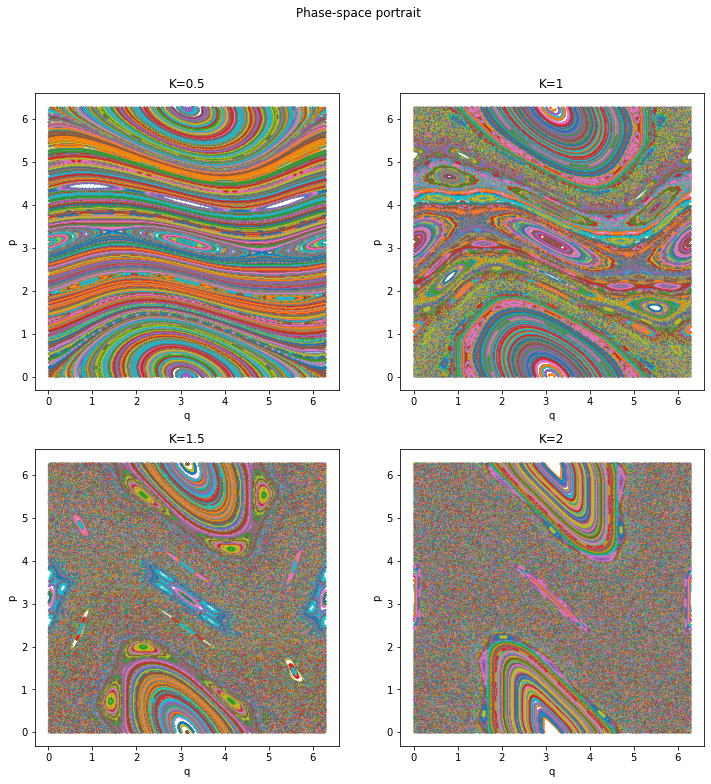

In [9]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(6*2,6*2))

rng = np.random.default_rng(1977)
Ks = [0.5, 1, 1.5, 2]

for i, K in enumerate(Ks):
    ax = axs[i//2, i%2]
    
    ax.set_xlabel("q")
    ax.set_ylabel("p")
    ax.set_title(f"K={K}")
    
    for x0 in rng.uniform(0, c2pi, (1000, 2)):
        data = nest(lambda x: stm(x, K), x0, 1000)
        ax.scatter(data[:,0], data[:,1], s = 0.1)

plt.suptitle("Phase-space portrait")
plt.savefig("stm_portrait.png")
plt.show()

## Lyapunov spectrum

lmax: 2.204135408900998e-05 0.11280088876111938
lmax: -0.00010065103140253187 0.20889250789562508
lmax: 6.74242118791785e-05 0.34146715427152946
lmax: 4.975401586942013e-05 0.49066142535911333


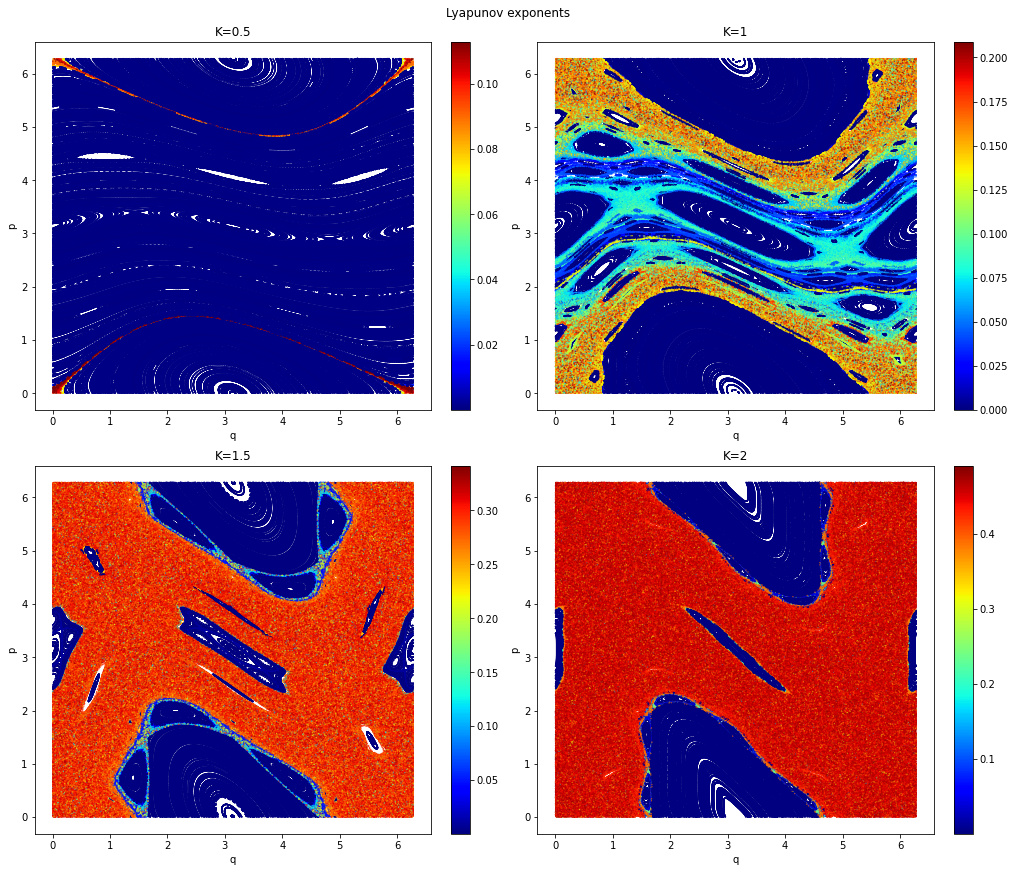

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(7*2,6*2), layout="constrained")

rng = np.random.default_rng(1977)
Ks = [0.5, 1, 1.5, 2]

for i, K in enumerate(Ks):
    ax = axs[i//2, i % 2]
    
    ax.set_xlabel("q")
    ax.set_ylabel("p")
    ax.set_title(f"K={K}")

    # generate data
    ls = []
    data = []
    for x0 in rng.uniform(0, c2pi, (1000, 2)):
        v = nest(lambda x: stm(x, K), x0, 1000)
        ls.append(stm_lyap(x0, K, 10**4)[0])
        data.append(v)
    ls = np.array(ls)
    
    lmin, lmax = min(ls), max(ls)
    print(f"lmax: {lmin} {lmax}") 

    # plotting stuff
    for l, v in zip(ls, data):
        pos = ax.scatter(v[:,0], v[:,1], s = 0.1, c = [l]*len(v), vmin=lmin, vmax=lmax, cmap = plt.cm.jet)
    
    fig.colorbar(pos, ax = ax)

plt.suptitle("Lyapunov exponents")
plt.savefig("stm_lyap.png")
plt.show()